In [1]:
import numpy as np

n = 100
log_min = np.log(513)
log_max = np.log(48000)

t = np.linspace(0, 1, n)
logs = log_min + (log_max - log_min) * t
values = np.exp(logs)
print("{", end="")
for i, v in enumerate(values):
    if i > 0:
        print(", ", end="")
    print(int(v - (v % 4)), end="")
print("};")


{512, 536, 560, 588, 616, 644, 672, 704, 740, 772, 808, 848, 888, 928, 972, 1020, 1068, 1116, 1168, 1224, 1280, 1340, 1404, 1472, 1540, 1612, 1688, 1768, 1848, 1936, 2028, 2124, 2224, 2328, 2436, 2552, 2672, 2796, 2928, 3064, 3208, 3360, 3516, 3680, 3856, 4036, 4224, 4424, 4632, 4848, 5076, 5312, 5564, 5824, 6096, 6384, 6684, 6996, 7324, 7668, 8028, 8404, 8800, 9212, 9644, 10096, 10572, 11068, 11588, 12128, 12700, 13296, 13920, 14572, 15256, 15972, 16720, 17504, 18328, 19188, 20088, 21028, 22016, 23048, 24128, 25260, 26448, 27688, 28988, 30348, 31772, 33260, 34820, 36456, 38164, 39956, 41832, 43792, 45848, 47996};


In [2]:
import pandas as pd
import matplotlib as mpl
# mpl.use("pgf")

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, PercentFormatter

In [3]:
# plt.style.use(['science', 'ieee'])
mpl.rcParams.update({
    "pgf.texsystem": 'pdflatex',
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": [],
    "pgf.rcfonts": False,
    "pgf.preamble": "\n".join([
      r'\usepackage{amsmath}',
      r"\usepackage[utf8x]{inputenc}",
      r"\usepackage[T1]{fontenc}",
      r"\usepackage{cmbright}",
    ]),
})

In [7]:
def plotFigure(csvPath, plotOver, peakPerf, xlabel, title, pgf_name, mark_intrinsics=False):
    plt.clf()
    fig, ax = plt.subplots()
    data = pd.read_csv(csvPath, sep=";")
    data['Size'] = data['Size'] * 4
    plt.figure(figsize=(10, 6))
    for type_exec in data['Test'].unique():
        subset = data[data['Test'] == type_exec]
        ax.plot(subset[plotOver], subset['GB/s'], label=type_exec)

    # ax.set_xscale('log')
    ax.axhline(y=peakPerf, linestyle='--', label='Peak', color='red')
    ax.axvline(x=32768)
    # ax.set_xticks([i for i in range(0, 241, 24)])
    # ax.xaxis.set_minor_locator(AutoMinorLocator(n=3)) # 0, 8, 16, 24 ...
    # ax.yaxis.set_minor_locator(AutoMinorLocator(n=2)) # 0, 0.1, 0.2 ...
    # ax.tick_params(axis='x', which='minor', length=2, direction='out')
    # ax.tick_params(axis='y', which='minor', length=2, direction='out')

    # ax2 = ax.twinx()
    # ax2.set_ylabel("GFLOPS (Peak Performance)")
    # ax2.yaxis.set_major_formatter(PercentFormatter(xmax=peakPerf))
    # ymin, ymax = ax.get_ylim()
    # ax2.set_ylim(ymin, ymax)
    # ax2.plot([],[])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('GB/s')
    ax.legend(loc='right', bbox_to_anchor=(1, 0.75))
    ax.grid(True)
    ax.set_title(title)
    plt.show()
    fig.savefig("pgf_export/" + pgf_name, format='pgf', backend='pgf')
    return data, fig, ax

<Figure size 640x480 with 0 Axes>

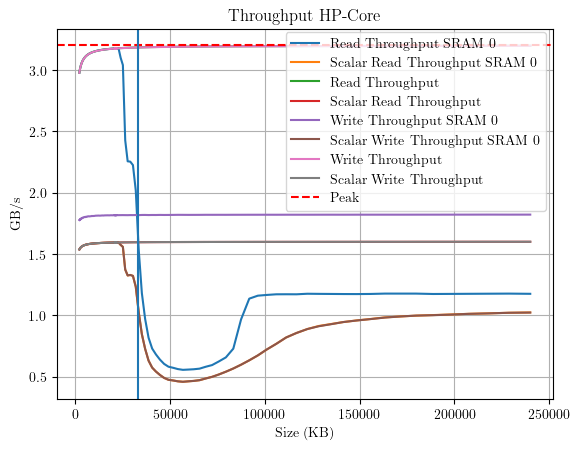

<Figure size 1000x600 with 0 Axes>

In [10]:
data, fig, ax = plotFigure('throughput_diff_size.csv', 'Size', 3.2, 'Size (KB)', "Throughput HP-Core", "throughput_diff_size.pgf")

<Figure size 640x480 with 0 Axes>

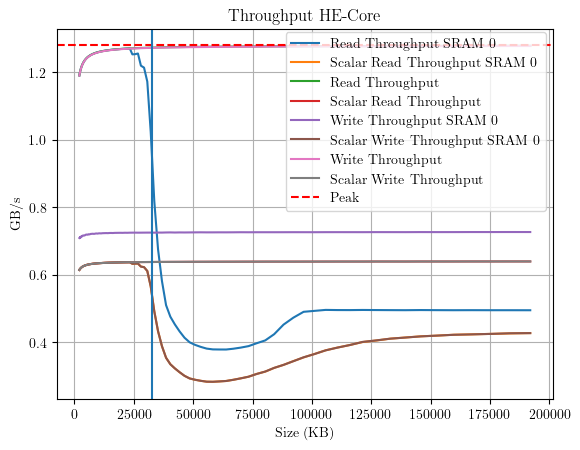

<Figure size 1000x600 with 0 Axes>

In [11]:
data, fig, ax = plotFigure('throughput_diff_size_he.csv', 'Size', 1.28, 'Size (KB)', "Throughput HE-Core", "throughput_diff_size_he.pgf")